In [2]:
from MechFinder import MechFinder
finder = MechFinder(collection_dir='collections')

# Finding mechanism for single reaction

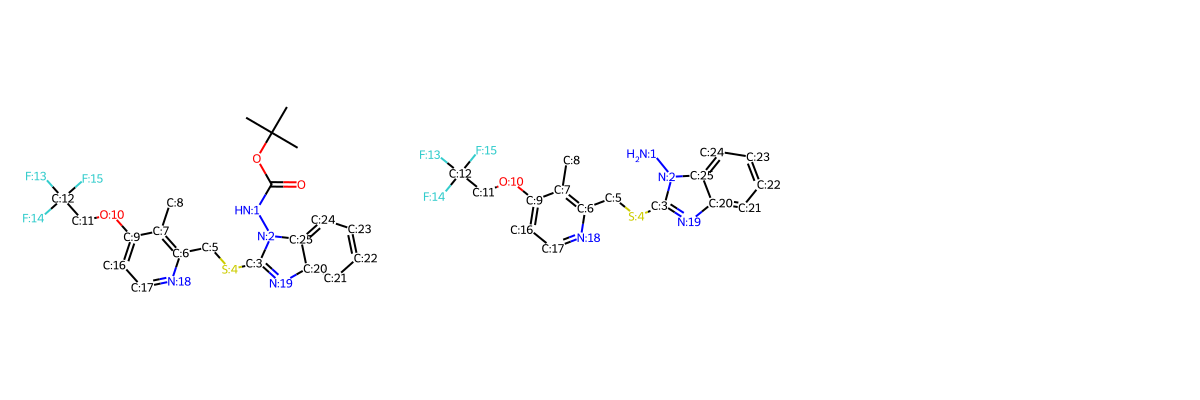

In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem
sampled_rxns = pd.read_csv('data/samples.csv')['reaction'].tolist() # randomly sampled reactions
sampled_rxn = np.random.choice(sampled_rxns, 1)[0]
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in  sampled_rxn.split('>>')], subImgSize=(400, 400))

Identified mechanistic class: SN2_alcohol(thiol)
Generated mechanism: [(301, 16.1), ([16.1, 16], 16), (16, 1), ([1, 101], 101)]


[16:34:00] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 3 
[16:34:00] WARNING: not removing hydrogen atom without neighbors


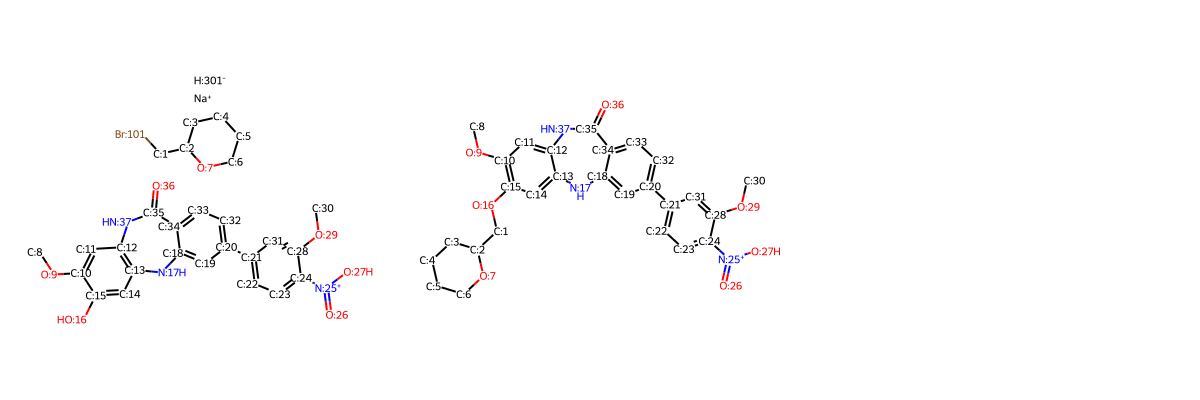

In [10]:
updated_reaction, LRT, MT_class, electron_path = finder.get_electron_path(sampled_rxn)
print ('Identified mechanistic class:', MT_class)
print ('Generated mechanism:', electron_path)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in  updated_reaction.split('>>')], subImgSize=(400, 400))

# Finding mechanism for a reaction dataset

In [5]:
from tqdm import tqdm
from collections import defaultdict

dataset_rxns = pd.read_csv('data/USPTO_33K.csv')
original_reactions = []
updated_reactions = []
mechanistic_classes = []
mechanistic_labels = []

for rxn in tqdm(dataset_rxns['reaction'], total=len(dataset_rxns)):
    updated_rxn, LRT, MT_class, electron_path = finder.get_electron_path(rxn)
    if not isinstance(finder.check_exception(MT_class), str):
        original_reactions.append(rxn)
        updated_reactions.append(updated_rxn)
        mechanistic_classes.append(MT_class)
        mechanistic_labels.append(electron_path)
        
print ('Labeled %d reactions.' % len(updated_reactions))

  0%|          | 0/33099 [00:00<?, ?it/s][10:53:15] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 2 3 4 5 6 7 8 9 10 11 
[10:53:15] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 4 
[10:53:15] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 3 
[10:53:15] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 3 
[10:53:15] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 4 
[10:53:15] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 4 
[10:53:15] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 3 
[10:53:15] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 4 
[10:53:15] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 3 
[10:53:15] mapped atoms in the

Labeled 31194 reactions.


In [ ]:
labeled_df = pd.DataFrame({
    'original_reactions': original_reactions, 
    'updated_reaction': updated_reactions, 
    'mechanistic_class': mechanistic_classes,
    'mechanistic_label': mechanistic_labels
    })
labeled_df.to_csv('data/mech-USPTO-31k.csv', index=None)

In [4]:
mechanisms = pd.read_csv('collections/MT_library.csv')

In [5]:
mechanisms.head()

,MT_class,mechanistic pathway,Unnamed: 2
0,DCC_condensation,"[(5, 4.1), ([4.1, 4], 4), (4, 6), ([6, 5], 5),...",NaN
1,nucleophilic_attack_to_(thio)carbonyl_or_sulfonyl,"[(1, 2), ([2, 3], 3), (3, [3, 2]), ([2, 4], 4)]",NaN
2,SN1,"[([2, 3], 3), (1, 2)]",NaN
3,SN2,"[(1, 2), ([2, 3], 3)]",NaN
4,SNAr,"# removed [(1, 2), ([2, 3], 3), (3, [3, 2]), (...",NaN


In [18]:
mechanisms.loc[~mechanisms['mechanistic pathway'].str.startswith('#')]

,MT_class,mechanistic pathway,Unnamed: 2,num_steps
0,DCC_condensation,"[(5, 4.1), ([4.1, 4], 4), (4, 6), ([6, 5], 5),...",NaN,144
1,nucleophilic_attack_to_(thio)carbonyl_or_sulfonyl,"[(1, 2), ([2, 3], 3), (3, [3, 2]), ([2, 4], 4)]",NaN,47
2,SN1,"[([2, 3], 3), (1, 2)]",NaN,21
3,SN2,"[(1, 2), ([2, 3], 3)]",NaN,21
5,carbonyl_reduction,"[([3, 3.1], 1), ([1, 2], 2), (2,4.1), ([4.1,4]...",NaN,50
...,...,...,...,...
76,SN2_with_tosylate,"[(3,4), ([4,5],5), (5,[5,4]), ([4,6],6), (6,3....",NaN,103
77,SN1_with_tosylate,"[(3,4), ([4,5],5), (5,[5,4]), ([4,6],6), (6,3....",NaN,103
78,base_cat_ester_hydrolysis,"[(4,2), ([2,3],3), (3,[3,2]), ([2,1],1), (5,4....",NaN,64
79,intramolecular_lactonization,"[(3,5), (1,2), ([2,3],3), (4,1.1), ([1.1,1],1)...",NaN,82


In [20]:
# add a column for the number of steps in the reaction pathway, which should equal the length of the array
mechanisms['num_steps']=mechanisms['mechanistic pathway'].map(lambda x: np.nan if x.startswith('#') else len(eval(x)))
#mechanisms.sort_values(by='num_steps', ascending=False).head(5)
mechanisms.head(5)

,MT_class,mechanistic pathway,Unnamed: 2,num_steps
0,DCC_condensation,"[(5, 4.1), ([4.1, 4], 4), (4, 6), ([6, 5], 5),...",NaN,12.0
1,nucleophilic_attack_to_(thio)carbonyl_or_sulfonyl,"[(1, 2), ([2, 3], 3), (3, [3, 2]), ([2, 4], 4)]",NaN,4.0
2,SN1,"[([2, 3], 3), (1, 2)]",NaN,2.0
3,SN2,"[(1, 2), ([2, 3], 3)]",NaN,2.0
4,SNAr,"# removed [(1, 2), ([2, 3], 3), (3, [3, 2]), (...",NaN,NaN


In [23]:
tmp=mechanisms.loc[mechanisms.num_steps.notna()].sort_values(by='num_steps', ascending=False)
tmp.tail(10)

,MT_class,mechanistic pathway,Unnamed: 2,num_steps
53,alcohol_dehydration,"[(3, 4), ([2, 3], 3), (3, 1.1), ([1.1, 1], [1,...",NaN,4.0
19,Wittig_ver_2,"[([4, 2], 1), ([1, 3], 4), ([1, 3], [3, 4]), (...",NaN,4.0
50,alpha_alkylation,"[(4, 1.1), ([1.1, 1], 1), (1, 2), ([2, 3], 3)]",NaN,4.0
63,SN2_alcohol(thiol),"[(4,1.1), ([1.1,1],1), (1,2), ([2,3],3), ]",NaN,4.0
39,sulfide_oxidation_by_peroxide,"[(1,2), ([2,3],3), (3,2.1), ([2.1,2],[2,1]), ]",NaN,4.0
14,alcohol_condensation,"[(3, 4), (1, 2), ([2, 3], 3), ([1.1,1],1)]",NaN,4.0
32,Markovnikov_addition,"[([2, 3], 4), (1, 2), ([1.1,1],1)]",NaN,3.0
66,imine_reduction,"[(2,4), ([3,3.1],1), ([1,2],2),]",NaN,3.0
3,SN2,"[(1, 2), ([2, 3], 3)]",NaN,2.0
2,SN1,"[([2, 3], 3), (1, 2)]",NaN,2.0


# Add curly arrows to illustrate the generated mechanism

# Future Data Analysis tasks

1. join LRT_library and MT_library and see which MT's are mapped to the most RT's
2. find reactions in a college chemistry textbook and determine which MT's are the most common in the reactions in the textbook. 
3. Determine if this program can find mechanisms for reactions that are not in the USPTO_33k.csv reaction dataset
4. generate mechanisms for sample reactions in each of the MTs in the college textbook using this software, and give it to a chemist at Stony brook to evaluate whether the mechanisms are realistic. If not, why not.

If the mechanisms are correct, then we have enough to make a software to throw up on the Web. The licence is MIT, which i think is commercial friendly. 

Still, there might be more to add to the web app in order to make the educational software as effective as possible. Specifically, we might want to use the software as well as the ai reaction extractor to explore chemical reaction space and find a minimal reductionist approach to determining mechanism.